<h2>Exercise 1 - What is “k” in the k-NN algorithm? Be specific.</h2>

**Answer:** K is for the number of neighbors to be used for classifying unlabeled neighbors

<h2>Exercise 2 - Which of the following is true about the k-NN algorithm? </h2>

**Answer:** A - When you increase k, the bias will increase as well

<h2>Exercise 3 - Why is it important to standardize the data before k-NN?</h2>

**Answer:** k-NN is a distance-based algorithm, and it calculates the distance between two points based on the Euclidean distance formula. It prevents a feature from dominating

<h2>Exercise 4 -  Given the following two statements, find which one of these options is true in the case
of k-NN?</h2>

**Answer:** C - Both a and b

<h2>Exercise 5</h2>
Use the iris dataset to answer the following questions. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. The goal of this exercise is to predict the iris class.

In [62]:
#5a - Using the pandas library, read the csv file and create a data-frame called iris.

import pandas as pd

iris = pd.read_csv('iris_data.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Text(0, 0.5, 'Petal Width')

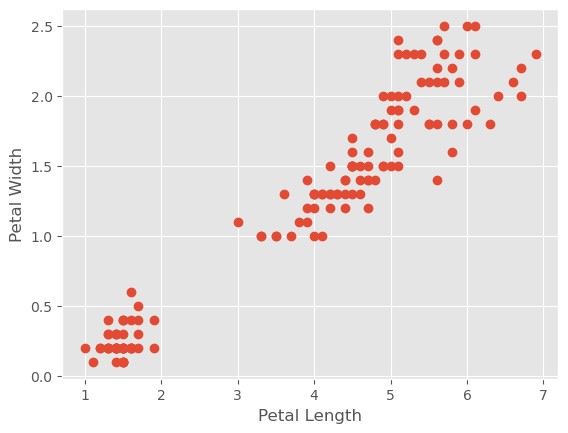

In [63]:
#5b - Create the scatter-plot between petal_length and petal_width. Comment on the plot. 
# Do you see any natural grouping in the data?

import matplotlib.pyplot as plt; plt.style.use('ggplot')
import numpy as np

plt.plot('petal_length', 'petal_width', 'o', data = iris)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

Positive linear correlation. There is natural grouping, it seems like a type of iris plant is much smaller in petal length and width

In [64]:
#5c - Calculate the z-score standardized values of the four variables and store them in 
# new columns named z_sepal_length, z_sepal_width, z_petal_length and z_petal_width

from scipy import stats
iris['z_sepal_length'] = stats.zscore(iris['sepal_length'])
iris['z_sepal_width'] = stats.zscore(iris['sepal_width'])
iris['z_petal_length'] = stats.zscore(iris['petal_length'])
iris['z_petal_width'] = stats.zscore(iris['petal_width'])

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class,z_sepal_length,z_sepal_width,z_petal_length,z_petal_width
0,5.1,3.5,1.4,0.2,Iris-setosa,-0.900681,1.032057,-1.341272,-1.312977
1,4.9,3.0,1.4,0.2,Iris-setosa,-1.143017,-0.124958,-1.341272,-1.312977
2,4.7,3.2,1.3,0.2,Iris-setosa,-1.385353,0.337848,-1.398138,-1.312977
3,4.6,3.1,1.5,0.2,Iris-setosa,-1.506521,0.106445,-1.284407,-1.312977
4,5.0,3.6,1.4,0.2,Iris-setosa,-1.021849,1.263460,-1.341272,-1.312977


In [65]:
iris['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [66]:
#5d - Split the iris data-frame into training and testing. Select the first 120 observations and the 
# standardized variables for the training dataset, and the remaining observations for the testing dataset. 
# Before you create your X_train, Y_train, X_test and Y_test, run the line of code shown below.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Random shuffle of the observations
iris = iris.sample(frac = 1, random_state = 453).reset_index(drop = True)

scaler = StandardScaler()

#Standardize features
iris.iloc[:, 5:9] = scaler.fit_transform(iris.iloc[:, 5:10])

#Split into train and test. First 120 rows for training
X_train = iris.loc[:119, ['z_sepal_length', 'z_sepal_width', 'z_petal_length', 'z_petal_width']]
Y_train = iris.loc[:119, 'class']
X_test = iris.loc[120:, ['z_sepal_length', 'z_sepal_width', 'z_petal_length', 'z_petal_width']]
Y_test = iris.loc[120:, 'class']

In [67]:
#5e - Build a k-NN classifier using the training dataset and 4 neighbors

four_nn = KNeighborsClassifier(n_neighbors = 4).fit(X_train, Y_train)

In [69]:
#5f - Using the model from part (e), predict class on the testing set.

from sklearn.metrics import accuracy_score

predictions = four_nn.predict(X_test)

In [70]:
#5g - Compare the predictions against the actuals

acc = accuracy_score(Y_test, predictions)
print(acc)

0.9333333333333333


<h2>Exercise 6</h2>
Use the diamonds.csv data file to answer the questions below. This datafile contains information related to almost 54,000 diamonds (including their prices). The goal is to predict the price of diamonds

In [31]:
#6a - Using the pandas library, read the csv file and create a data-frame called diamonds

diamonds = pd.read_csv('diamonds.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Text(0, 0.5, 'Price')

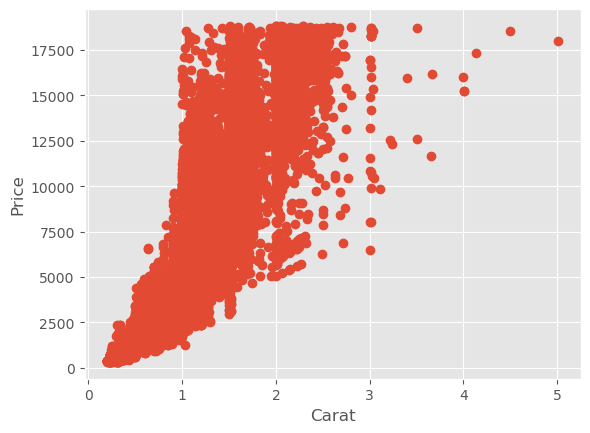

In [32]:
#6b - Create the scatter-plot of carat and price. Comment on the plot.

plt.plot('carat', 'price', 'o', data = diamonds)
plt.xlabel('Carat')
plt.ylabel('Price')

From the above, there is a positive correlation but it is also pretty messy

In [33]:
#6c - Calculate the z-score standardized values of carat, depth, table, x, y and z, and
#store them in columns named z_carat, z_depth, z_table, z_x, z_y and z_z.

diamonds['z_carat'] = stats.zscore(diamonds['carat'])
diamonds['z_depth'] = stats.zscore(diamonds['depth'])
diamonds['z_table'] = stats.zscore(diamonds['table'])
diamonds['z_x'] = stats.zscore(diamonds['x'])
diamonds['z_y'] = stats.zscore(diamonds['y'])
diamonds['z_z'] = stats.zscore(diamonds['z'])

diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,z_carat,z_depth,z_table,z_x,z_y,z_z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.198168,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.240361,-1.360738,1.585529,-1.641325,-1.658774,-1.741175
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.198168,-3.385019,3.375663,-1.498691,-1.457395,-1.741175
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.071587,0.454133,0.242928,-1.364971,-1.317305,-1.287720
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.029394,1.082358,0.242928,-1.240167,-1.212238,-1.117674


In [40]:
#6d - Split the diamonds data-frame into training and testing. Select the first 43,000
#observations and the standardized variables for the training dataset

#Random shuffle of the observations
diamonds = diamonds.sample(frac = 1, random_state = 823).reset_index(drop = True)

scaler = StandardScaler()

#Standardize features
diamonds.iloc[:, 11:17] = scaler.fit_transform(diamonds.iloc[:, 11:17])

#Split into train and test
X_train = diamonds.loc[:42999, ['z_carat', 'z_depth', 'z_table', 'z_x', 'z_y', 'z_z']]
Y_train = diamonds.loc[:42999, 'price']
X_test = diamonds.loc[43000:, ['z_carat', 'z_depth', 'z_table', 'z_x', 'z_y', 'z_z']]
Y_test = diamonds.loc[43000:, 'price']

In [41]:
#6e - Build a k-NN regressor using the training dataset and 10 neighbors.

from sklearn.neighbors import KNeighborsRegressor

ten_nn = KNeighborsRegressor(n_neighbors = 10).fit(X_train, Y_train)

In [42]:
#6f - Using the model from part (e), predict price on the testing set.

predictions = ten_nn.predict(X_test)

Text(0, 0.5, 'Predicted Price')

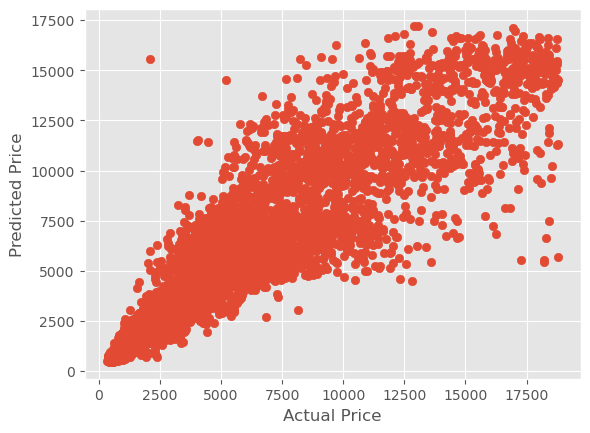

In [46]:
#6g - Compare the predictions against the actuals by creating a scatter plot. 

plt.scatter(Y_test, predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

Very positive linear correlation between the 2